In [145]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
TEST_DATASET_PATH = 'test.csv'
TRAIN_DATASET_PATH = 'train.csv'

In [147]:
test_data = pd.read_csv(TEST_DATASET_PATH)
train_data = pd.read_csv(TRAIN_DATASET_PATH)


In [148]:
train_data.shape

(10000, 20)

In [149]:
train_data.dtypes


Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [150]:
category_map =  { 'A': 0, 'B': 1,}
train_data['Ecology_2'] = train_data['Ecology_2'].map(category_map)
train_data['Ecology_3'] = train_data['Ecology_3'].map(category_map)
train_data['Shops_2'] = train_data['Shops_2'].map(category_map)

test_data['Ecology_2'] = test_data['Ecology_2'].map(category_map)
test_data['Ecology_3'] = test_data['Ecology_3'].map(category_map)
test_data['Shops_2'] = test_data['Shops_2'].map(category_map)

In [151]:
df_num_features = train_data.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


In [152]:
df_num_features.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [153]:
df_num_features.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,0.003099,-0.005408,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.003645,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,-0.093406,-0.027902,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,-0.021018,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,-0.001971,-0.005909,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,-0.000146,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,0.029926,0.022748,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,-0.049380,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,0.006808,0.008597,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,-0.004692,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.000268,-0.007919,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,-0.017315,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,0.049661,0.025767,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,-0.013626,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,0.059347,0.009258,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.051002,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.000997,0.001686,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.002994,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,0.079809,-0.058381


<function matplotlib.pyplot.show(*args, **kw)>

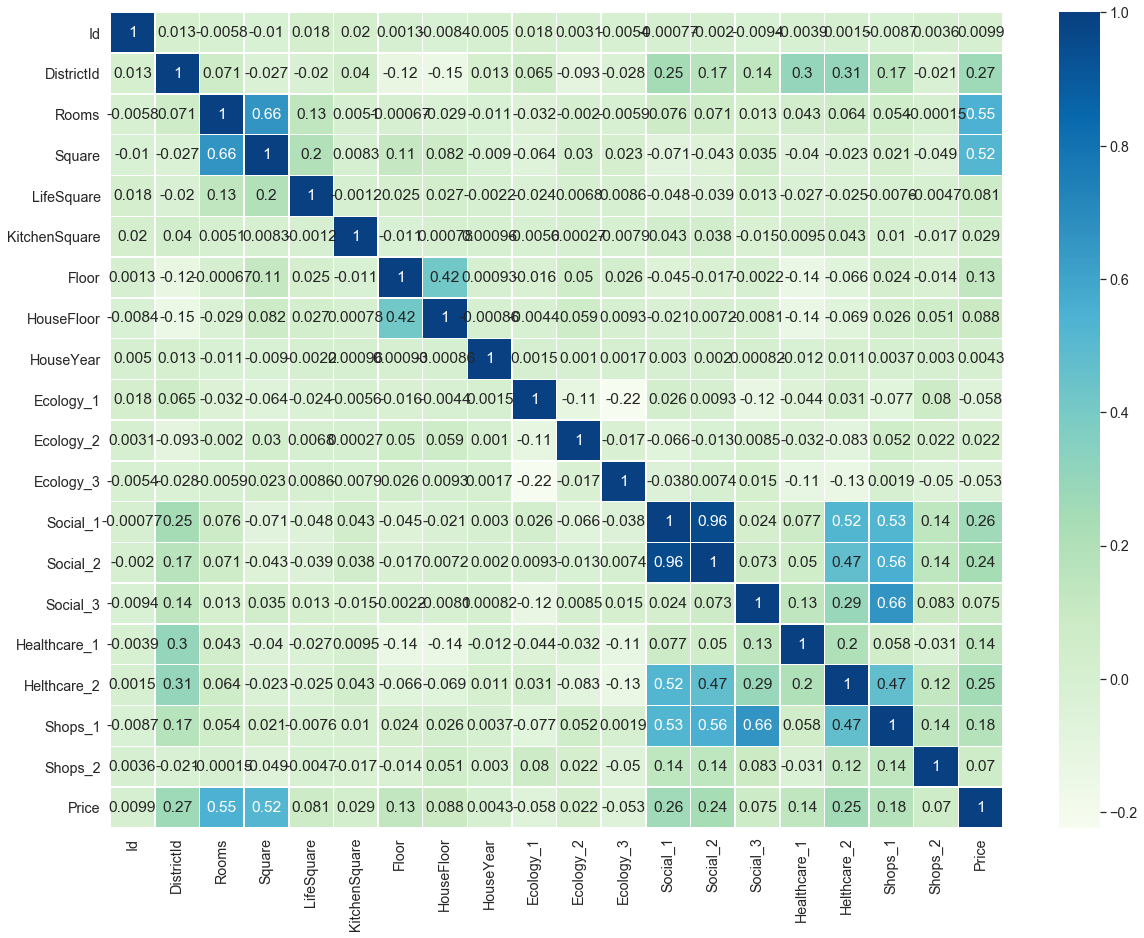

In [154]:
plt.figure(figsize = (20,15))

sns.set(font_scale = 1.3)
sns.heatmap(df_num_features.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.show


In [155]:
train_data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [156]:
train_data.loc[train_data['LifeSquare'].isnull(), 'LifeSquare'] = train_data['LifeSquare'].median()
test_data.loc[test_data['LifeSquare'].isnull(), 'LifeSquare'] = test_data['LifeSquare'].median()

In [157]:
train_data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [158]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [159]:
train_data[train_data['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,1,74,19083,2,NaN,5,15,1,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,NaN,0,1,1,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,1,1,66,10573,1,1322.0,3,8,1,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,1,1,25,5648,1,30.0,2,4,1,172329.270863


In [160]:
train_data.loc[train_data['Rooms'] >= 6, 'Rooms'] = train_data['Rooms'].median()

test_data.loc[train_data['Rooms'] >= 6, 'Rooms'] = test_data['Rooms'].median()


In [161]:
train_data[train_data['Square'] > 200]

test_data[test_data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,1,1,53,14892,4,NaN,1,4,1
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,1,1,7,1660,39,1786.0,1,5,1


In [162]:
train_data.loc[train_data['Square'] >= 200, 'Square'] = train_data['Square'].median()

test_data.loc[test_data['Square'] >= 200, 'Square'] = test_data['Square'].median()

In [163]:
train_data[train_data['Square'] < train_data['LifeSquare']]

test_data[test_data['Square'] < test_data['LifeSquare']]



,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,1,1,4,915,0,NaN,0,0,1
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,1,1,22,6398,141,1046.0,3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1
4951,3711,94,1.0,41.281057,42.392594,10.0,13,13.0,2014,0.282798,1,1,33,8667,2,NaN,0,6,1
4962,5820,94,1.0,33.680382,34.198977,1.0,10,9.0,1972,0.127376,1,1,43,8429,3,NaN,3,9,1
4969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,1,1,35,7715,4,990.0,0,6,1


In [164]:
train_data.loc[train_data['Square'] < train_data['LifeSquare'], 'LifeSquare'] = train_data.loc[train_data['Square'] < train_data['LifeSquare'], 'Square']/(train_data['Square']/train_data['LifeSquare']).mean()

In [165]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886800,56.112872,33.703157,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.812805,18.903876,13.959953,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,23.795985,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513040,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.879387,38.562936,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,5.000000,198.930182,161.504222,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [166]:
train_data[train_data['KitchenSquare'] > 115]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,1,1,2,629,1,NaN,0,0,0,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,1,1,30,5285,0,645.0,6,6,1,105539.556275
9895,2737,27,3.0,123.430072,59.821762,123.0,5,10.0,2015,0.017647,1,1,2,469,0,NaN,0,0,1,234194.837047


In [167]:
train_data.loc[train_data['KitchenSquare'] >= 200, 'KitchenSquare'] = train_data['KitchenSquare'].median()

test_data.loc[test_data['KitchenSquare'] >= 200, 'KitchenSquare'] = test_data['KitchenSquare'].median()

In [168]:
train_data[train_data['HouseFloor'] > 30]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
339,11563,8,1.0,50.390862,41.642898,0.0,32,32.0,2008,0.092291,1,1,21,4346,2,165.0,1,2,1,97480.845791
359,15722,31,2.0,82.435495,48.655394,16.0,23,40.0,2013,0.151346,1,0,32,5889,10,830.0,4,1,1,558262.139114
540,5279,93,2.0,60.804544,30.923827,11.0,5,45.0,2016,0.050900,1,1,43,10621,1,30.0,2,3,1,213171.135199
1956,15157,54,1.0,106.239622,83.296167,17.0,26,37.0,2009,0.006076,1,1,30,5285,0,645.0,6,6,1,274139.065875
1982,5548,86,5.0,52.513310,25.451162,26.0,12,37.0,2011,0.161976,1,0,31,7010,5,4508.0,3,7,1,455264.882666
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,1,1,7,1660,39,1786.0,1,5,1,411691.504766
3330,3298,31,1.0,57.551691,21.551876,10.0,32,40.0,1977,0.151346,1,0,32,5889,10,830.0,4,1,1,393799.531732
3662,1102,54,3.0,101.279843,52.188698,20.0,20,37.0,2014,0.006076,1,1,30,5285,0,645.0,6,6,1,124844.932865
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,1,1,37,7687,11,176.0,5,5,1,450706.552655
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,1,1,22,6398,141,1046.0,3,23,1,117647.461002


In [169]:
train_data.loc[train_data['HouseFloor'] >= 30, 'HouseFloor'] = train_data['HouseFloor'].median()

test_data.loc[test_data['HouseFloor'] >= 30, 'HouseFloor'] = test_data['HouseFloor'].median()

In [170]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886800,56.112872,33.703157,5.876100,8.526700,12.481500,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.812805,18.903876,13.959953,5.174014,5.241148,6.395479,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,23.795985,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513040,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.879387,38.562936,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,5.000000,198.930182,161.504222,123.000000,42.000000,29.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [171]:
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


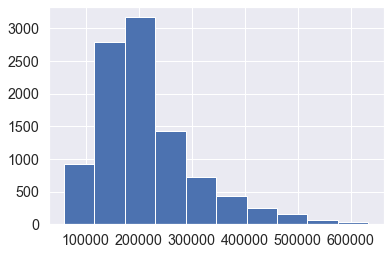

In [172]:
train_data['Price'].hist()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['Healthcare_1', 'Price'], axis = 'columns'), train_data['Price'], test_size=0.3, random_state=18)

In [176]:
rf_model = RandomForestRegressor(max_depth=19, n_estimators = 150, random_state = 30)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [177]:
first_predict = rf_model.predict(X_test)
r2(y_test, first_predict)

0.7384560311294875

In [180]:
final_predict = rf_model.predict(test_data.drop(['Healthcare_1'], axis = 'columns'))


In [182]:
test_data['Price'] = final_predict

In [183]:
test_data[['Id', 'Price']].to_csv('Maxim_Chumychkin.csv', index = False)